In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import os
# from google.colab import files
# from google.colab import drive

plt.rcParams.update({'font.size': 22})
%matplotlib inline
plt.style.use('seaborn')

# drive.mount('/content/drive')

In [2]:
data = pd.read_csv('data.csv')
data_year = pd.read_csv('data_by_year.csv')
data_genres = pd.read_csv('data_by_genres.csv')
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [4]:
data_year

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1
98,1,2019,0.278299,0.644814,201024.788096,0.593224,0.077640,0.172616,-7.722192,0.121043,120.235644,0.458818,65.256542,1


# EDA

In [5]:
data.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

/Users/ming-hunghung/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

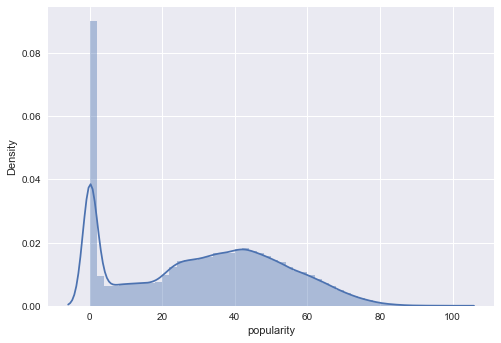

In [6]:
sns.distplot(data['popularity'])

In [7]:
data['decade'] = data['year'].apply(lambda x: '{}s'.format(int(x / 10) * 10))
data['decade'].value_counts()

1970s    20000
1990s    19901
1950s    19850
1980s    19850
2010s    19774
2000s    19646
1960s    19549
1940s    15378
1930s     9549
1920s     5126
2020s     2030
Name: decade, dtype: int64

/Users/ming-hunghung/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='decade', ylabel='count'>

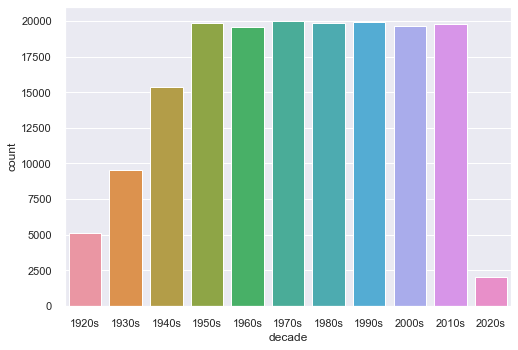

In [8]:
sns.set_theme(style="darkgrid")
sns.countplot(data['decade'])

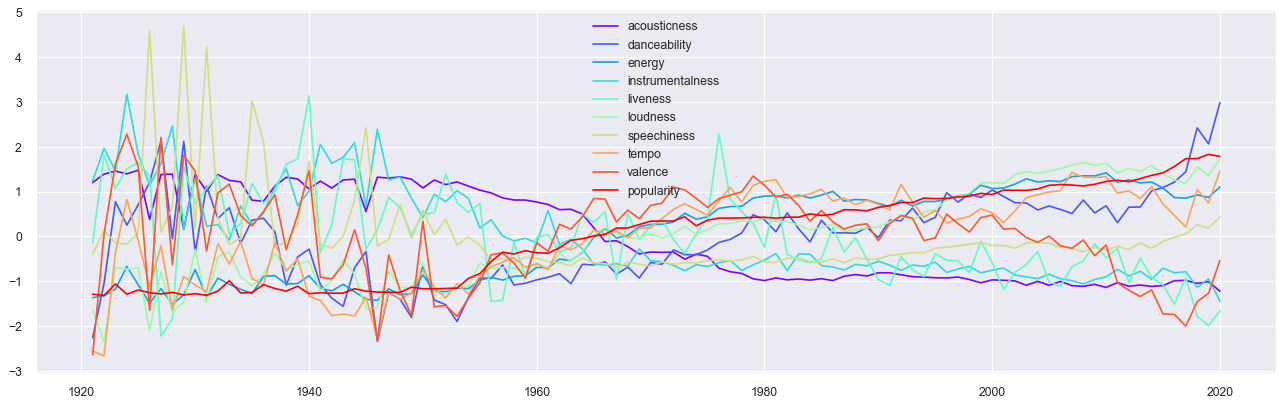

In [9]:
from matplotlib.pyplot import figure
from matplotlib.pyplot import cm

# plt.style.use('seaborn')
figure(figsize=(20, 6), dpi=80)

data_year_normalized = data_year.copy()
numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']
data_year_normalized[numerical_features] = data_year[numerical_features].apply(lambda x: (x - x.mean()) / (x.std()))
color = cm.rainbow(np.linspace(0, 1, len(numerical_features)))

for i, c in zip(range(len(numerical_features)), color):
    plt.plot(data_year_normalized['year'], data_year_normalized[numerical_features[i]], label=numerical_features[i], color=c)

#plt.plot(data_year_normalized['year'], data_year_normalized[numerical_features], label=numerical_features)
plt.legend(loc = 'upper center')
plt.show()

In [10]:
import plotly.express as px 
fig = px.line(data_year_normalized, x='year', y=numerical_features)

fig.show()

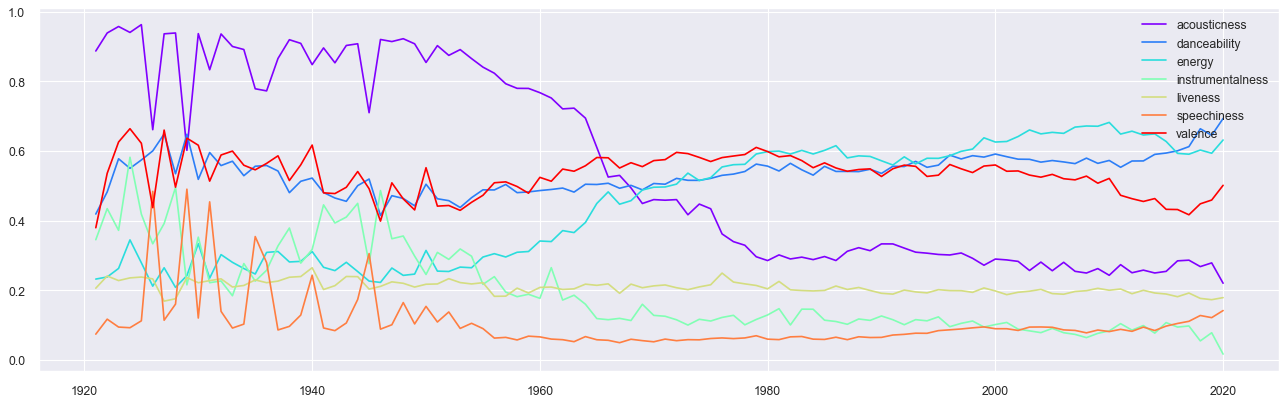

In [11]:
import plotly.express as px 
figure(figsize=(20, 6), dpi=80)

sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
color = cm.rainbow(np.linspace(0, 1, len(sound_features)))

for i, c in zip(range(len(sound_features)), color):
    plt.plot(data_year['year'], data_year[sound_features[i]], label=sound_features[i], color=c)

#plt.plot(data_year_normalized['year'], data_year_normalized[numerical_features], label=numerical_features)
plt.legend(loc = 'upper right')
plt.show()

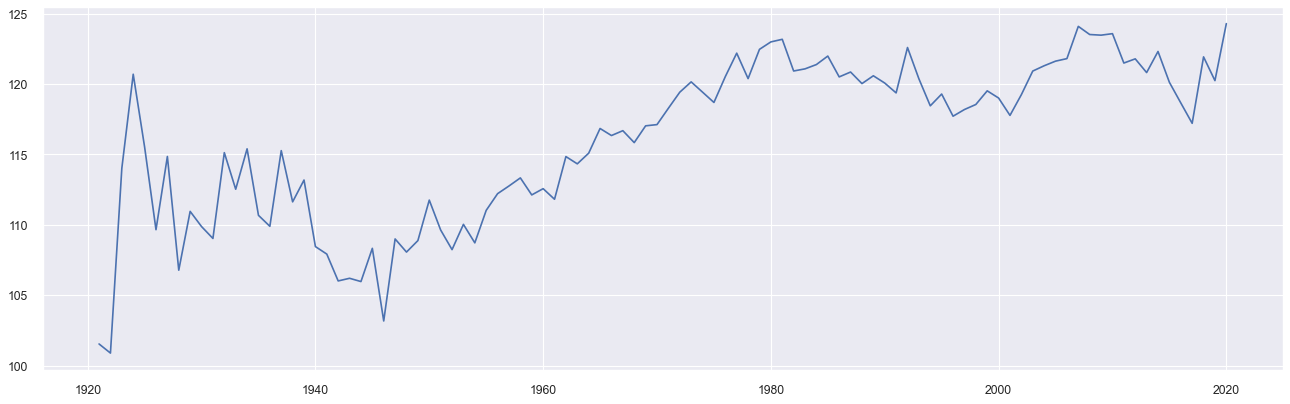

In [12]:
figure(figsize=(20, 6), dpi=80)
plt.plot(data_year['year'], data_year['tempo'])

In [13]:
top10_genres = data_genres.nlargest(10, 'popularity')
fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

# Clustering

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipe = Pipeline([('sclaer', StandardScaler()), ('kmeans', KMeans(n_clusters=5))])

X = data_genres.select_dtypes(np.number)
cluster_pipe.fit(X)
data_genres['cluster'] = cluster_pipe.predict(X)


In [4]:
from sklearn.decomposition import PCA

pca_pipe = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
X_transform = pca_pipe.fit_transform(X)

tmp = pd.DataFrame(columns=['x', 'y'], data=X_transform)
tmp['cluster'] = data_genres['cluster']
#plt.scatter(tmp['x'], tmp['y'], color=tmp['cluster'])

/Users/ming-hunghung/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 1200x480 with 0 Axes>

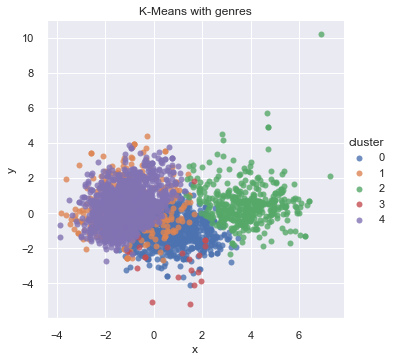

In [16]:
figure(figsize=(15, 6), dpi=80)
sns.lmplot('x', 'y', data=tmp, hue='cluster', fit_reg=False)
plt.title('K-Means with genres')
plt.show()

In [17]:
song_cluster_pipe = Pipeline([('sclaer', StandardScaler()), ('kmeans', KMeans(n_clusters=5))])

cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'year', 'popularity']
X = data[cols]
song_cluster_pipe.fit(X)
data['cluster'] = song_cluster_pipe.predict(X)

/Users/ming-hunghung/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 1200x480 with 0 Axes>

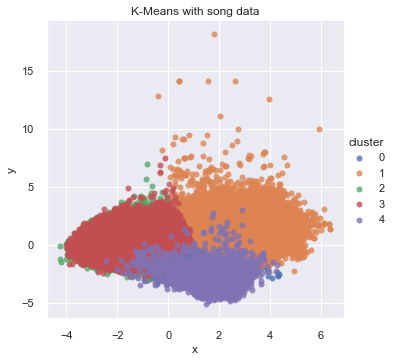

In [18]:
pca_pipe = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
X_transform = pca_pipe.fit_transform(X)

tmp = pd.DataFrame(columns=['x', 'y'], data=X_transform)
tmp['cluster'] = data['cluster']

#plt.scatter(tmp['x'], tmp['y'], color=tmp['cluster'])

figure(figsize=(15, 6), dpi=80)
sns.lmplot('x', 'y', data=tmp, hue='cluster', fit_reg=False)
plt.title('K-Means with song data')
plt.show()